# DEF-D Fysieke Ontwerpopdracht 1 invul template

## Groepsgegevens en planning 

Aan het einde van deze ontwerpopdracht lever je als groep dit notebook gezamenlijk in via een pull request op Github en lever je een link naar dit pull request in op Brightspace. Zet jullie studienummers en namen in onderstaande tabel zodat wij zeker weten dat het groepsvormen goed is gegaan. Werk in de juiste branch.

| Groep: 52     |  |
| :-------------|:-------------|
| Koen Gort |6574963 |
| Tije Kijlstra | 6448003 |
| Justin Sloots | 6541313 |

| Planning Groep: 52     |Tijdstip / Tijdspanne  |
|---|---|
| Mijlpaal 1: Criteria opgesteld | 11:30 |
| Mijlpaal 2: Eerste kalibratie meting gedaan| 15:00 |
| Pauze 1| 12:45-13:45 |
| Pauze 2| 16:00-16:15 |

## *Opdracht 1*: Foto van alle schetsen.

Zet de foto in dezelfde map als dit notebook en verander hieronder de naam in de naam van de foto.

![Alt](Foto_schetsen_ideeen.jpeg "analyse: ideeen")

## *Opdracht 2*, MIJLPAAL, Leerdoel
Vul onderstaande tabel in en geef aan met welke sensor je verder gaat.** Laat dit aan je TA zien.** Als je TA druk is: ga wel ondertussen door met de volgende stap.

| Sensor | Toepassing | Criteria |
|:---|:---|:---|
|LDR | Automatisch licht dat aangaat wanneer het buiten donker is. | 1. Moet kunnen meten wanneer het tussen de 1 en de 500 lux is. 2. moet voor een 5 minuten deze lagere waarde meten voordat het licht aangaat. 3. nauwkeurigheid van 1 lux. |
|LDR | Automatische zonnewering | Criteria omschrijving |
|LDR | Kijken of klaslokalen goed belicht zijn | Criteria omschrijving |
|Thermistor | Thermostaat die automatisch aan gaat | Criteria omschrijving |
|Thermistor | Oververhitting in telefoons opmerken | 1. Moet temperaturen kunnen meten tussen 30 en 60 graden celsius. 2. moet verschillen van halve graden kunnen meten. |
|Thermistor | Automatisch de ramen open als het te warm wordt | Criteria omschrijving |
|Krachtsensor | boksbal die de kracht van je stoot meet | 1. De meetbare waardes moeten tussen 0 en 2000 N liggen. 2. Nauwkeurigheid van 5 N. |
|Krachtsensor | drukgevoelige knoppen | Criteria omschrijving |
|Krachtsensor | meten hoe hard je je laptop dicht doet. | Criteria omschrijving |

Groep 52 heeft gekozen voor sensor Krachtsensor. 

## *Opdracht 3*: Foto van de schets van jouw meetopstelling in.
Licht kort toe wat er in de foto te zien is.
 ![Alt](Schets_Circuit_Opdracht1.jpeg "schets student")

## *Opdracht 4*: Beantwoord de vragen

1. Welke variabelen ga je veranderen? Het gewicht wat op de sensor staat.
2. Over welk bereik ga je deze variabelen veranderen? Tussen de 0 gram en 1.25 kg, wat ongeveer tussen de 0 N en de 12.25 N zit.
3. Wat ga je allemaal meten? De gegeven waarde van de arduino (bits) bij een bepaald gewicht.
4. Hoeveel metingen ga je doen? 10 Metingen
5. Ga je met deze keuzes kunnen evalueren of jouw sensor geschikt is voor de gekozen toepassingen? Ja, want dan kunnen we interpoleren wat de maximaal meetbare waarde is.


## *Opdracht 5*: Foto van jouw meetopstelling in. Leerdoel.
Licht kort toe wat er in de foto te zien is.
 ![Alt](OpstellingOpdracht1.jpeg "meetopstelling student")

## *Opdracht 6*: Meten en fitten, Leerdoel

In [12]:
# Zet hier jouw data in een voor jou handig formaat
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

massa = np.array([0, 0.09286, 0.48126+0.09286, 0.59907+0.09286, 0.5677+0.09286, 0.8751+0.09286])  #massa van gewichten in kg
bits_raw = np.array([1023, 1013, 945, 934, 952, 924])  #gegeven waarde door de arduino in bits

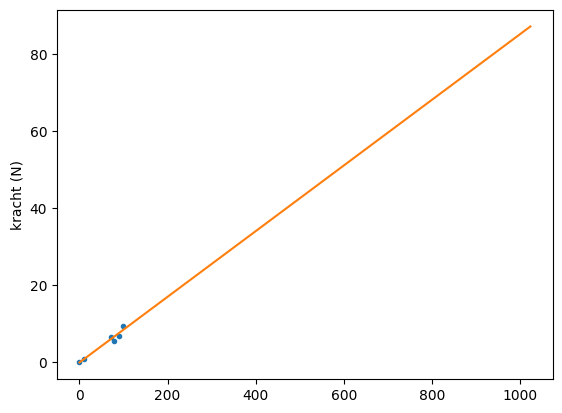

In [13]:
# Plot hier de meting en fit een lijn door de metingen.
# Maak gebruik van wat je geleerd hebt bij het practicum.

bits_omgerekend = 1023 - bits_raw # omrekenen zodat de waarde nu van 0 tot 1023 i.p.v. van 1023 tot 0
newton = massa * 9.81    # massa omrekenen naar Newton

def verhouding(x,a,b):
    return a*x+b

pvar,pcov= curve_fit(verhouding, bits_omgerekend, newton)
x_fit = np.linspace(0,1023, 1024)
gefit = verhouding(x_fit, pvar[0], pvar[1])

plt.figure()
plt.plot(bits_omgerekend, newton, ".")
plt.plot(x_fit, gefit)
plt.xlabel
plt.ylabel("kracht (N)")
plt.show()
%matplotlib inline


## *Opdracht 7*: Iteratie nodig?

Vervang deze tekst door jouw antwoord.

## *Opdracht 8*: Conclusie, leerdoel

Vervang deze tekst door jouw conclusie. 

## *Opdracht 9*: Aantonen leerdoelen beheersing

Om aan te tonen dat je de leerdoelen beheerst, kopieer je hieronder alle cellen met 'leerdoel' in de titel. Zet zelf de cellen onder de goede kopjes. Mogelijk komt een cel bij meerdere leerdoelen terug.

### Leerdoel 1: Simpele circuits (RC-circuit, spanningsdelers met sensoren) ontwerpen en fabriceren.

Kopieer hier de cel(len) waaruit blijkt dat jullie leerdoel 1 beheersen.

### Leerdoel 2: Ontwerpeisen voor een opdracht SMART opstellen en vervolgens de ontwerpcyclus inrichten, rekening houdend met de randvoorwaarde van de opdracht.

Kopieer hier de cel(len) waaruit blijkt dat jullie leerdoel 2 beheersen.

### Leerdoel 3: Voor een gegeven sensor & analoog-digitaal convertor en gegeven (of zelf gekozen) toepassing een kalibratie meting ontwerpen, inclusief het circuit om de sensor aan te sluiten op de analoog-digitaal convertor, de opstelling bouwen, en meetresultaten verwerken en concluderen of de combinatie van sensor en analoog-digitaal conversie geschikt is voor de toepassing.

Kopieer hier de cel(len) waaruit blijkt dat jullie leerdoel 3 beheersen.